# MI Canopy Data

In [35]:
# path of the file
myfile=r"C:/py/Michigan_DNR_Forestry_Canopy_Data.csv"

**Data Exploration**

In [43]:
# import pandas
import pandas as pd

# read csv file using pandas
canopy = pd.read_csv(myfile, sep=',', header=0)

In [44]:
# getting some infromation about the data in the pandawell dataframe
canopy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577610 entries, 0 to 577609
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   OBJECTID          577610 non-null  int64  
 1   CommonName        576368 non-null  object 
 2   Genus             576368 non-null  object 
 3   Species           576368 non-null  object 
 4   SpeciesAge        174572 non-null  float64
 5   StandAge          577051 non-null  float64
 6   StandOriginYear   577051 non-null  float64
 7   CanopySpecies     577610 non-null  int64  
 8   PercentCover      577601 non-null  float64
 9   SizeClass         577610 non-null  object 
 10  DBH               577603 non-null  float64
 11  CanopyClosure     577542 non-null  object 
 12  GlobalID          577610 non-null  object 
 13  FCSKey            577584 non-null  object 
 14  SpeciesOrginYear  174572 non-null  float64
 15  SnapshotYear      577610 non-null  int64  
 16  SHAPE_Length      57

**(1) Trying out different commands**

In [42]:
# # selecting a column
canopy['Species']

0             rubrum
1          saccharum
2             rubrum
3         papyrifera
4             rubrum
             ...    
577605       strobus
577606     banksiana
577607       strobus
577608       strobus
577609       strobus
Name: Species, Length: 577610, dtype: object

In [57]:
canopy['StandAge']

0         100.0
1          76.0
2          76.0
3          76.0
4         117.0
          ...  
577605     30.0
577606     30.0
577607     55.0
577608     54.0
577609     98.0
Name: StandAge, Length: 577610, dtype: float64

In [45]:
canopy.columns.tolist()

['OBJECTID',
 'CommonName',
 'Genus',
 'Species',
 'SpeciesAge',
 'StandAge',
 'StandOriginYear',
 'CanopySpecies',
 'PercentCover',
 'SizeClass',
 'DBH',
 'CanopyClosure',
 'GlobalID',
 'FCSKey',
 'SpeciesOrginYear',
 'SnapshotYear',
 'SHAPE_Length',
 'SHAPE_Area']

**(2) Stats**

In [46]:
# find mean DBH
canopy['DBH'].mean()

8.507100898021651

In [50]:
# find maximum DBH
canopy['DBH'].max()

60.0

**(3) Grouping**

In [58]:
# find out total count of each DRILL_METH
canopy.groupby('SizeClass').size()

SizeClass
Log                  76664
Log/Pole             88205
Log/Pole/Sap          3848
Log/Pole/XLog         9758
Log/XLog             14923
Log/XLog/Pole         4375
Pole                117326
Pole/Log             55167
Pole/Log/Sap          6038
Pole/Log/XLog          752
Pole/Sap/Log         10022
Pole/Sapling         51383
Sapling              86826
Sapling/Pole         32251
Sapling/Pole/Log       800
Unspecified             33
XLog                  8068
XLog/Log             10191
XLog/Log/Pole          980
dtype: int64

In [59]:
canopy['Species'].value_counts()

rubrum           71393
strobus          49036
tremuloides      48548
resinosa         35276
grandidentata    35209
                 ...  
unspecified          5
glutinosa            3
dentata              3
spicatum             2
triloba              1
Name: Species, Length: 70, dtype: int64

In [60]:
canopy['Genus'].value_counts()

Pinus           106572
Acer             93271
Populus          92998
Quercus          65915
Betula           37821
Picea            35752
Abies            33422
Thuja            23647
Prunus           23487
Fraxinus         13168
Larix            11209
Tsuga            10091
Tilia             8486
Fagus             7667
Ulmus             3300
Carya             2436
Ostrya            2407
Sassafras         1012
Juglans            973
Robinia            781
Liriodendron       543
Salix              379
Celtis             220
Nyssa              214
Platanus           160
Juniperus          114
Amelanchier         98
Malus               63
Gleditsia           54
Carpinus            24
Morus               23
Catalpa             18
Ailanthus           11
Sorbus              10
Unspecified          5
Pseudotsuga          5
Maclura              5
Alnus                3
Castanea             3
Asimina              1
Name: Genus, dtype: int64

**(4) Pivot Table**

In [62]:
# pivot table of which COUNTY contains how many of a specific DRILL_METH
canopy.pivot_table(index="SizeClass", columns="Genus", values="PercentCover", aggfunc='size')

Genus,Abies,Acer,Ailanthus,Alnus,Amelanchier,Asimina,Betula,Carpinus,Carya,Castanea,...,Quercus,Robinia,Salix,Sassafras,Sorbus,Thuja,Tilia,Tsuga,Ulmus,Unspecified
SizeClass,,,,,,,,,,,,,,,,,,,,,
Log,121.0,8172.0,NaN,NaN,NaN,NaN,3005.0,2.0,1066.0,NaN,...,15904.0,144.0,107.0,161.0,1.0,2042.0,2681.0,3298.0,519.0,NaN
Log/Pole,708.0,17403.0,NaN,NaN,NaN,NaN,5876.0,NaN,369.0,NaN,...,10641.0,225.0,48.0,202.0,NaN,5262.0,3320.0,2706.0,463.0,NaN
Log/Pole/Sap,36.0,905.0,NaN,NaN,NaN,NaN,52.0,NaN,5.0,NaN,...,698.0,1.0,1.0,2.0,NaN,65.0,25.0,35.0,4.0,NaN
Log/Pole/XLog,8.0,1561.0,NaN,NaN,NaN,NaN,152.0,NaN,24.0,NaN,...,2026.0,12.0,NaN,3.0,NaN,234.0,196.0,373.0,5.0,NaN
Log/XLog,1.0,1074.0,NaN,NaN,NaN,NaN,215.0,NaN,230.0,NaN,...,4300.0,13.0,19.0,2.0,NaN,108.0,322.0,569.0,15.0,NaN
Log/XLog/Pole,2.0,520.0,NaN,NaN,NaN,NaN,71.0,NaN,13.0,NaN,...,1000.0,2.0,1.0,NaN,NaN,56.0,73.0,173.0,NaN,NaN
Pole,12819.0,18409.0,6.0,NaN,9.0,1.0,12950.0,5.0,230.0,1.0,...,4353.0,179.0,48.0,345.0,NaN,7912.0,534.0,952.0,1362.0,NaN
Pole/Log,1704.0,12383.0,NaN,NaN,NaN,NaN,4922.0,NaN,68.0,NaN,...,3648.0,80.0,22.0,90.0,NaN,4457.0,774.0,949.0,272.0,NaN
Pole/Log/Sap,332.0,1269.0,1.0,NaN,NaN,NaN,285.0,NaN,4.0,NaN,...,679.0,5.0,3.0,NaN,NaN,363.0,14.0,50.0,22.0,NaN


**(5) Plotting a Column**

<AxesSubplot:>

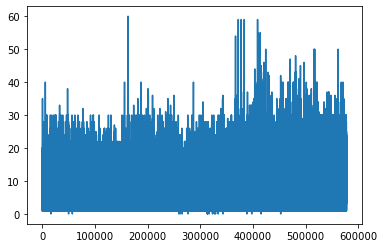

In [63]:
# Well depth graph
canopy['DBH'].plot()